# sparkR分析与应用 

-  **数据流**  
 ... | spark.streaming | spark.producer | rkafka.cosumer | rmodel.apply | rkafka.producer | kafka.consumer | spark.streaming ...

# 环境准备
> kafka、spark环境准备  

## notebook启动  
cd e:\ADwork\books\Rmarkdown\introRslide\4Routlier\  
d:\python27\scripts\jupyter notebook

## kafka启动  
cd D:\users\zookeeper-3.4.8  
.\bin\zkServer  

cd D:\users\kafka_2.11-0.10.0.0  
.\bin\windows\kafka-server-start.bat .\config\server.properties  

kafka-topics.bat --create --zookeeper localhost:2181 --replication-factor 1 --partitions 1 --topic test  
kafka-console-producer.bat --broker-list localhost:9092 --topic test  
kafka-console-consumer.bat --zookeeper localhost:2181   --topic test  

## rkafka也可消费kafka消息   
 
## spark kafka wordcount 示例消息生成与消费
> http://www.aboutyun.com/thread-9580-1-1.html  

cd D:\soft\fenxi\spark\spark-1.6.1-bin-hadoop2.6  
bin\run-example org.apache.spark.examples.streaming.KafkaWordCountProducer localhost:9092 test2 1 5  
bin\run-example org.apache.spark.examples.streaming.KafkaWordCount localhost:2181 test-consumer-group test2 1

##  rkafka也可消费
consumer2=rkafka.createConsumer("127.0.0.1:2181","test2",groupId="test-consumer-group")
print(rkafka.read(consumer2))
rkafka.closeConsumer(consumer2)



rkafka消费示例


In [3]:
library(rkafka)
consumer1=rkafka.createConsumer("127.0.0.1:2181","test",groupId="test-consumer-group")    
for (i in 1:10) {
    print(i)
    print(rkafka.read(consumer1))
    Sys.sleep(2)
}
rkafka.closeConsumer(consumer1)


Loading required package: rJava
Loading required package: RUnit
Loading required package: rkafkajars


[1] "Java-Object{com.musigma.consumer.MuConsumer@7ea987ac}"
[1] 1
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "new "
[1] 2
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "xx"
[1] 3
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "h"
[1] 4
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "b"
[1] 5
[1] "INFO: Remember to close the consumer after done reading messages"
[1] ""
[1] 6
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "c"
[1] 7
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "lksadjf"
[1] 8
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "sdf"
[1] 9
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "32"
[1] 10
[1] "INFO: Remember to close the consumer after done reading messages"
[1] "dsf"


rkafka消费示例


#  **R 模型训练和保存**  

In [3]:
# 数据准备 使用数据集IRIS 来做聚类和回归  
# getwd()  
data(iris)  
df_x=iris  
xname=names(df_x)[1:4];xname  
yname=names(df_x)[5];yname  
head(df_x,2)  


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"

[1] "Species"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa


kmeans模型训练

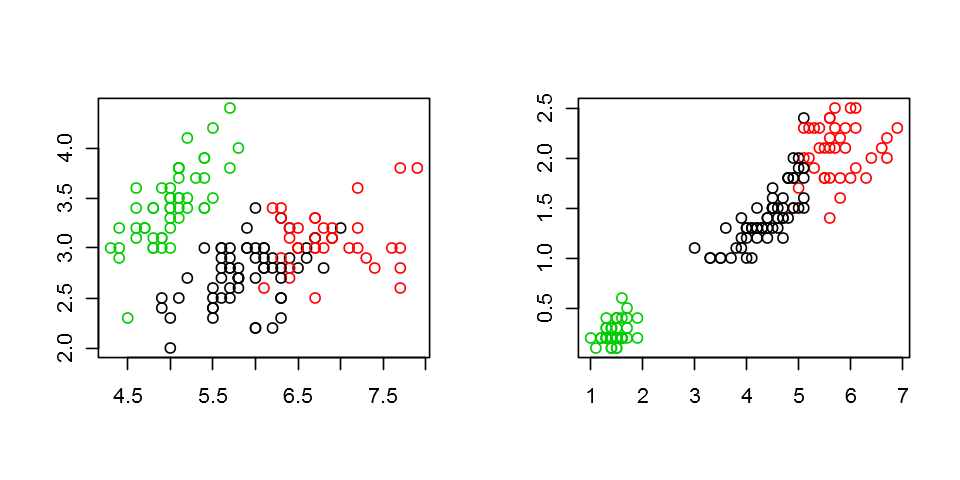

In [4]:
par(mfrow = c(1, 2), ann = FALSE)
options(repr.plot.width=8, repr.plot.height=4)
# 二维布局 
cl_model=kmeans(df_x[,xname],3)
plot(df_x[,1:2], col = cl_model$cluster)
plot(df_x[,3:4], col = cl_model$cluster)


kmeans模型预测

In [5]:
# 预测新数据的类别
getcl <- function(x,cl){
  c=cl$centers;nc=nrow(c)
  xnew=c()
  for (i in 1:nc) xnew=rbind(xnew,x)
  clsum=rowSums((c-xnew)^2)
  return(which.min(clsum) )
}

# 示例
getcl(df_x[5,xname],cl_model)

52 
 3

lm模型训练

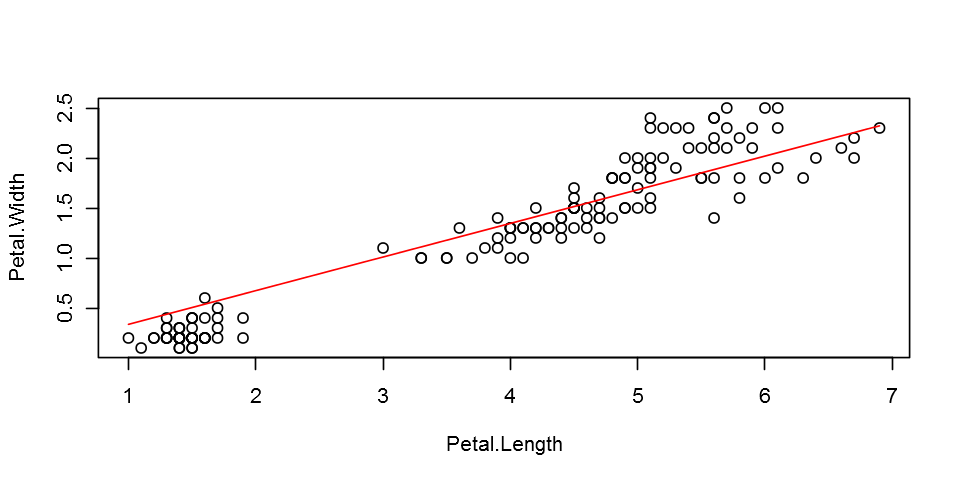

In [6]:
# train model lm
#lm_model=lm(y~x1+x2+x3+x4+x5-1,df_x)
lm_model=lm(Petal.Width~Petal.Length-1,df_x)
plot(Petal.Width~Petal.Length,df_x) 
lines(lm_model$fitted.values~df_x$Petal.Length,col='red')


lm模型预测

In [7]:
#对新数据点进行预测 predict
predict(lm_model,df_x[1,xname])

1 
0.4711152

模型保存

In [8]:
#把模型保存到本地文件 
save(cl_model,lm_model,getcl,file='test.model')

# 模型导入 

导入模型文件  

In [4]:
# 新启动notebook后，这些变量和模型，都不存在
head(df_x)
lm_model


ERROR: Error in head(df_x): 找不到对象'df_x'


In [3]:
# load model 
# setwd('./4Routlier/')
df_x=iris
xname=names(df_x)[1:4];xname  
yname=names(df_x)[5];yname  
load('test.model')
getcl(df_x[1,1:4],cl_model)
predict(lm_model,df_x[1,])


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"

[1] "Species"

3 
3

1 
0.4711152

In [6]:
# 运行上面的load后，这些变量和模型，就加载进来了
head(df_x,2)
lm_model


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa



Call:
lm(formula = Petal.Width ~ Petal.Length - 1, data = df_x)

Coefficients:
Petal.Length  
      0.3365  


# 模型应用 

生成者和消费者准备

In [5]:
# 建立rkafka生产者和消费者
library(rkafka)
produer=rkafka.createProducer("127.0.0.1:9092")
consumer=rkafka.createConsumer("127.0.0.1:2181","test2",groupId="test-consumer-group")


[1] "Java-Object{com.musigma.consumer.MuConsumer@3d74bf60}"


读入消息->应用模型->发送结果


In [6]:
clname=c('cl1','cl2','cl3')
nstop=1
#while (nstop<9) {
for (nstop in 1:5) {
  instr=rkafka.read(consumer)
  print(instr)
  x=as.numeric(unlist(strsplit(instr,' ') ) )
  names(x)=c(xname,yname)
  #
  outcl=getcl(x[1:4],cl_model)
  outlm=predict(lm_model,as.data.frame(t(x)))
  #
  outstr=paste(instr,'|',outcl,'|',outlm )
  rkafka.send(produer,"test","127.0.0.1:9092",outstr)
  #nstop=x[1]
}


[1] "INFO: Remember to close the consumer after done reading messages"
[1] ""


ERROR: Error in names(x) = c(xname, yname): 'names'属性的长度[5]必需和矢量的长度[0]一样


关闭连接

In [ ]:
rkafka.closeConsumer(consumer)
rkafka.closeProducer(produer)

## R与数据平台
spark之sparkR： http://spark.apache.org/docs/latest/sparkr.html  
hadoop之Rhadoop： https://github.com/RevolutionAnalytics/RHadoop/wiki   
R强化版之MRO/RRO： https://mran.microsoft.com/open/    
R强化版之MicrosoftRServer/deployr： https://msdn.microsoft.com/zh-cn/microsoft-r/index    
R交互rJava： http://www.rforge.net/rJava/   
R交互renjin： http://docs.renjin.org/en/latest/   
R服务rest化之OpenCPU//FastRWeb/plumber： https://github.com/opencpu/opencpu   
 

![deploy R using deployr](https://github.com/duerdu/introRslide/blob/master/pic/deployr_flow.PNG)

## 参考
KafkaWordCount:http://www.aboutyun.com/thread-9580-1-1.html
